In [ ]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as skl

In [ ]:
#importing the dataset
dataset=pd.read_csv('/content/Multivariate_Linear_Regression.csv')
print(dataset)

             X1         X2        X3         X4           y
0     20.631730  12.867703  8.395460  13.990905  189.031908
1      4.101116   5.433219  3.563688   7.586737   65.410833
2     11.924915  -4.457952  4.307833  -3.869729   34.669369
3     33.079571  13.541840  0.573275   5.720989  189.053144
4     23.595950  14.390700  2.435688  28.890003  215.060877
...         ...        ...       ...        ...         ...
4995  34.957819  12.133620 -4.530844   1.458013  177.207858
4996  41.573404  18.242280  4.724725   6.538582  295.463522
4997  15.128376   7.109396  5.293913  -3.501484  126.802408
4998  -4.791663  29.005545 -4.566243  18.247600   90.613662
4999   0.188991  21.316331  6.174126   5.524740  103.556223

[5000 rows x 5 columns]


In [ ]:
dataset.head(10)

,X1,X2,X3,X4,y
0,20.631730,12.867703,8.395460,13.990905,189.031908
1,4.101116,5.433219,3.563688,7.586737,65.410833
2,11.924915,-4.457952,4.307833,-3.869729,34.669369
3,33.079571,13.541840,0.573275,5.720989,189.053144
4,23.595950,14.390700,2.435688,28.890003,215.060877
5,46.254685,9.541961,13.150003,15.310407,314.309704
6,29.777814,31.386578,4.465882,8.527147,264.308270
7,28.604324,14.096900,-3.123978,23.236881,202.554278
8,10.338116,5.995014,14.162629,25.726974,159.486723
9,9.939408,11.312036,4.826665,25.614143,131.868001


In [ ]:
dataset.describe()

,X1,X2,X3,X4,y
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,22.663415,15.083334,4.966898,12.624664,194.586527
std,15.817222,11.599067,5.726316,10.171455,86.737743
min,-4.976895,-4.999482,-4.996529,-4.999851,-52.207438
25%,8.908293,5.139366,-0.055639,3.877419,131.157467
50%,22.535634,15.171626,4.997043,12.832065,194.676329
75%,36.587648,25.233339,9.893794,21.527947,258.002962
max,49.998196,34.994327,14.995766,29.999219,424.786090


In [ ]:
dataset.dtypes

X1    float64
X2    float64
X3    float64
X4    float64
y     float64
dtype: object

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      5000 non-null   float64
 1   X2      5000 non-null   float64
 2   X3      5000 non-null   float64
 3   X4      5000 non-null   float64
 4   y       5000 non-null   float64
dtypes: float64(5)
memory usage: 195.4 KB


In [ ]:
dataset.duplicated().sum()

0

In [ ]:
dataset.isnull().sum()

X1    0
X2    0
X3    0
X4    0
y     0
dtype: int64

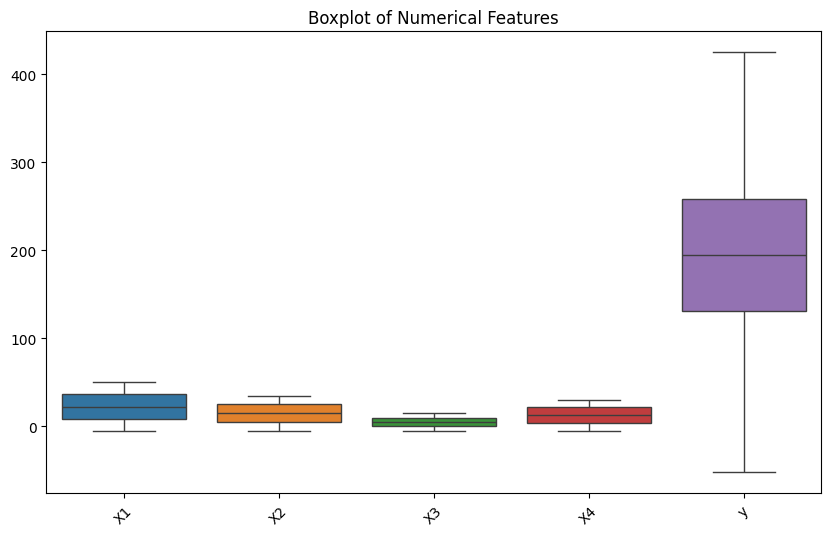

In [ ]:
# Visualize outliers with boxplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset.select_dtypes(include=['float64']))
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset[['X1', 'X2', 'X3', 'X4']] = scaler.fit_transform(dataset[['X1', 'X2', 'X3', 'X4']])


In [ ]:
corr=dataset.corr()
print(corr)

          X1        X2        X3        X4         y
X1  1.000000 -0.003326  0.002384  0.002559  0.791217
X2 -0.003326  1.000000  0.015286 -0.015690  0.491728
X3  0.002384  0.015286  1.000000 -0.007669  0.309604
X4  0.002559 -0.015690 -0.007669  1.000000  0.138912
y   0.791217  0.491728  0.309604  0.138912  1.000000


<Axes: >

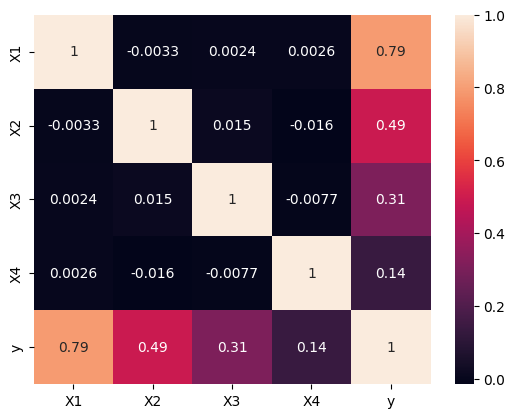

In [ ]:
sns.heatmap(corr,annot=True)

In [ ]:
# Extract features (X) and target variable (y)
X = dataset[['X1', 'X2', 'X3', 'X4']].values
y = dataset['y'].values
print(X)
print(y)


[[-0.12846048 -0.19103711  0.59879757  0.13433456]
 [-1.17366726 -0.83205657 -0.2450705  -0.49535007]
 [-0.67897981 -1.68489751 -0.11510556 -1.62179766]
 ...
 [-0.47642956 -0.68753246  0.05711308 -1.58559031]
 [-1.73594478  1.20040715 -1.66496116  0.55287057]
 [-1.42102527  0.53742428  0.21084204 -0.69809416]]
[189.03190793  65.4108333   34.66936859 ... 126.80240758  90.61366184
 103.55622308]


In [ ]:
# Initialize parameters
a0, a1, a2, a3,a4 = 0, 0, 0, 0, 0# Initialize all parameters to 0
alpha = 0.01  # Learning rate
epochs = 1000  # Number of iterations

# Perform Gradient Descent
for _ in range(epochs):
    # Predict
    y_pred = a0 + a1*X[:,0] + a2*X[:,1] + a3*X[:,2] + a4*X[:,3]

    # Calculate error
    errors = y_pred - y

    # Calculate cost
    cost = np.mean(errors ** 2) / 2

    # Calculate gradients
    gradient_a0 = np.mean(errors)
    gradient_a1 = np.mean(errors * X[:,0])
    gradient_a2 = np.mean(errors * X[:,1])
    gradient_a3 = np.mean(errors * X[:,2])
    gradient_a4 = np.mean(errors * X[:,3])


    # Update parameters
    a0 -= alpha * gradient_a0
    a1 -= alpha * gradient_a1
    a2 -= alpha * gradient_a2
    a3 -= alpha * gradient_a3
    a4 -= alpha * gradient_a4


    # Print cost every 100 epochs
    if (_ + 1) % 100 == 0:
        print(f"Cost after {_ + 1} epochs: {cost}")

# Print the multiple linear regression equation
equation = f"y = {a0} + {a1} * X1 + {a2} * X2 + {a3} * X3 + {a4} * x4"
print("Multiple Linear Regression Equation:")
print(equation)


Cost after 100 epochs: 3159.4521108001145
Cost after 200 epochs: 481.49835144582084
Cost after 300 epochs: 122.76752321484042
Cost after 400 epochs: 74.70872191613219
Cost after 500 epochs: 68.269766280458
Cost after 600 epochs: 67.40699451662022
Cost after 700 epochs: 67.29137951157531
Cost after 800 epochs: 67.2758852767357
Cost after 900 epochs: 67.2738086250998
Cost after 1000 epochs: 67.27353027284674
Multiple Linear Regression Equation:
y = 194.57812686345952 + 68.66558325063143 * X1 + 42.67401517104904 * X2 + 26.13253490842781 * X3 + 12.74111858874598 * x4


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Importing the dataset
dataset = pd.read_csv('/content/Multivariate_Linear_Regression.csv')

# Scale the features
scaler = StandardScaler()
dataset[['X1', 'X2', 'X3', 'X4']] = scaler.fit_transform(dataset[['X1', 'X2', 'X3', 'X4']])

# Extract features (X) and target variable (y)
X = dataset[['X1', 'X2', 'X3', 'X4']].values
y = dataset['y'].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Print the coefficients
print("Intercept:", regressor.intercept_)
print("Coefficients:", regressor.coef_)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Print the multiple linear regression equation
equation = f"y = {regressor.intercept_} + "
for i, coef in enumerate(regressor.coef_):
    equation += f"{coef} * X{i+1} + "
equation = equation[:-3]  # Remove the last ' + '
print("Multiple Linear Regression Equation:")
print(equation)


Intercept: 194.58516640236388
Coefficients: [68.5765142  42.75124133 26.14377499 12.90720418]
Multiple Linear Regression Equation:
y = 194.58516640236388 + 68.576514199503 * X1 + 42.75124133307972 * X2 + 26.143774985746198 * X3 + 12.907204178562594 * X4


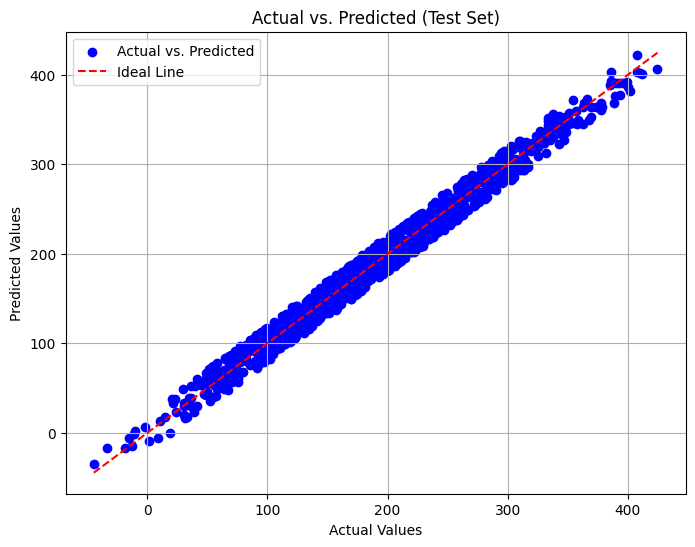

In [ ]:
import matplotlib.pyplot as plt

# Plotting the actual vs. predicted values for the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line')
plt.title('Actual vs. Predicted (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()
